In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

# 1. Exploratory Data Analysis and Data Understanding

In [ ]:
# Load the dataset
df = pd.read_csv('/content/milknew.csv')

In [ ]:
# Display the first 5 rows
print(df.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium


In [ ]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (1059, 8)


In [ ]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [ ]:
#Drop duplicates (if any)
df = df.drop_duplicates()
print("Dataset Shape After Dropping Duplicates:", df.shape)

Dataset Shape After Dropping Duplicates: (83, 8)


In [ ]:
# Get summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())

Summary Statistics:
               pH  Temprature      Taste       Odor       Fat   Turbidity  \
count  83.000000   83.000000  83.000000  83.000000  83.000000  83.000000   
mean    6.668675   43.698795   0.493976   0.397590   0.602410   0.433735   
std     0.986856    9.379187   0.503003   0.492375   0.492375   0.498602   
min     3.000000   34.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.500000   38.000000   0.000000   0.000000   0.000000   0.000000   
50%     6.600000   41.000000   0.000000   0.000000   1.000000   0.000000   
75%     6.800000   45.000000   1.000000   1.000000   1.000000   1.000000   
max     9.500000   90.000000   1.000000   1.000000   1.000000   1.000000   

           Colour  
count   83.000000  
mean   251.313253  
std      4.577058  
min    240.000000  
25%    247.000000  
50%    255.000000  
75%    255.000000  
max    255.000000  


In [ ]:
# Check unique values in the target column (Grade)
print("Unique Values in 'Grade':", df['Grade'].unique())


Unique Values in 'Grade': ['high' 'low' 'medium']


In [ ]:
# Summary statistics for the target column (Grade)
print("Target Column Summary:\n", df['Grade'].value_counts())

Target Column Summary:
 Grade
medium    34
low       26
high      23
Name: count, dtype: int64


# VISUALIZATION

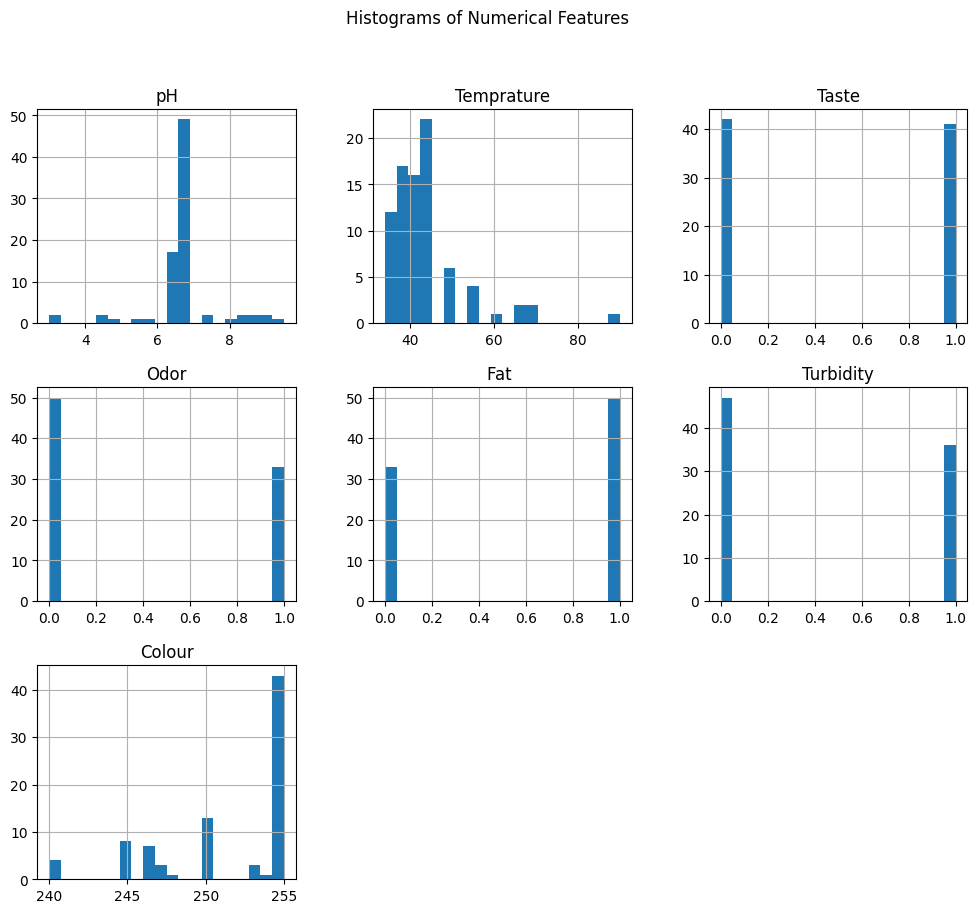

In [ ]:
# Plot histograms for all numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')  #//////////YET TO UNDERSTAND THE FIG
plt.show()

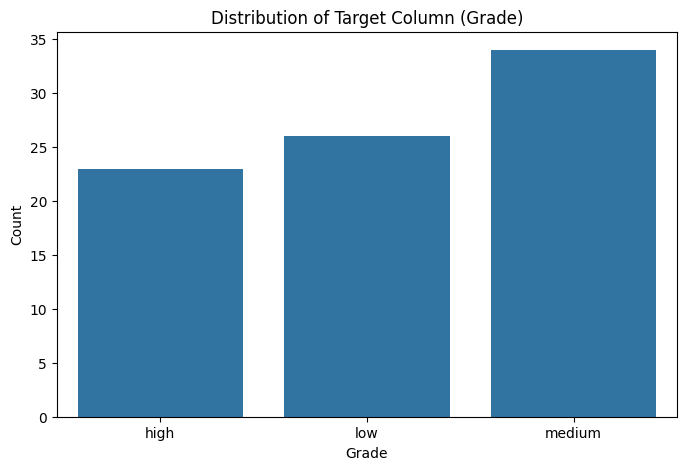

In [ ]:
# Visualize the distribution of the target variable (bar plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=df)
plt.title('Distribution of Target Column (Grade)')          #LINES TO BE ADDED IN Y AXIS...
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

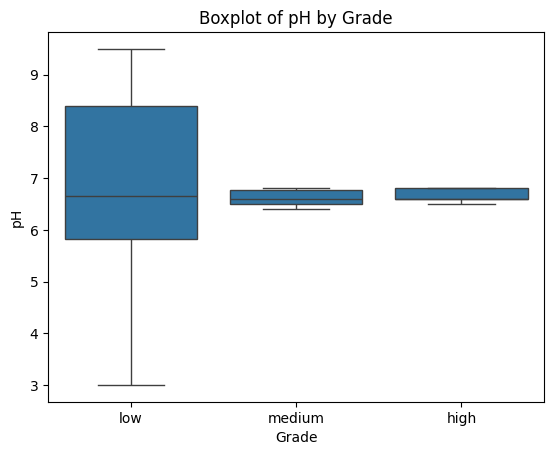

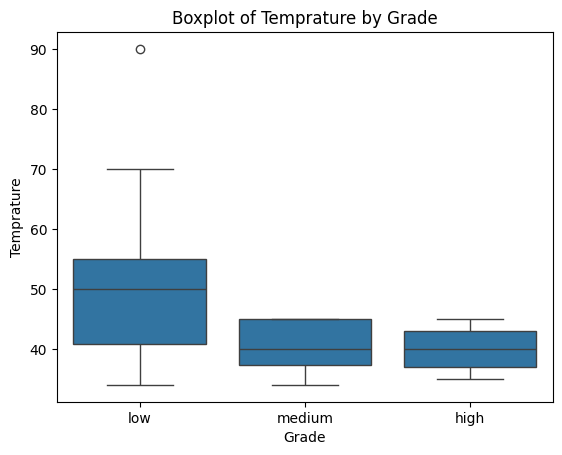

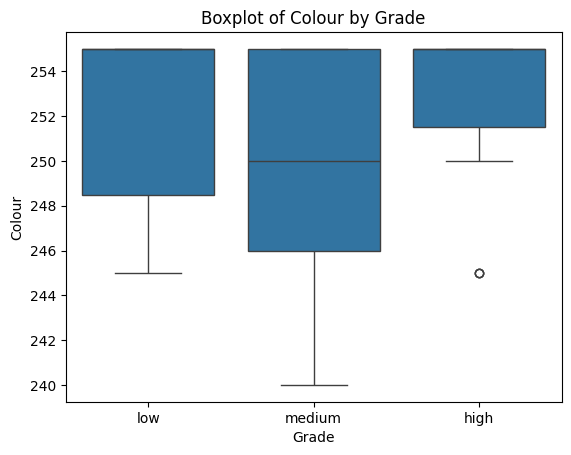

In [ ]:
# Plot boxplots for numerical features grouped by Grade
numerical_features = ['pH', 'Temprature', 'Colour']
for feature in numerical_features:
    sns.boxplot(x='Grade', y=feature, data=df, order=['low', 'medium', 'high'])
    plt.title(f'Boxplot of {feature} by Grade')
    plt.show()

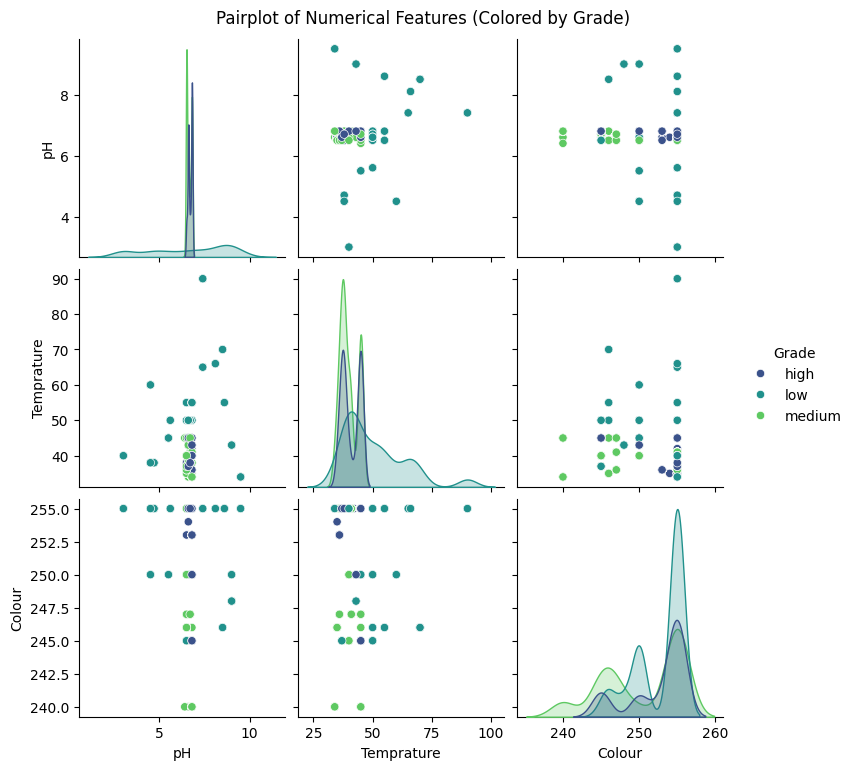

In [ ]:
# Pairplot for numerical features, colored by Grade
numerical_features = ['pH', 'Temprature', 'Colour'] # Define numerical_features here
sns.pairplot(df, hue='Grade', vars=numerical_features, palette='viridis')
plt.suptitle('Pairplot of Numerical Features (Colored by Grade)', y=1.02)
plt.show()

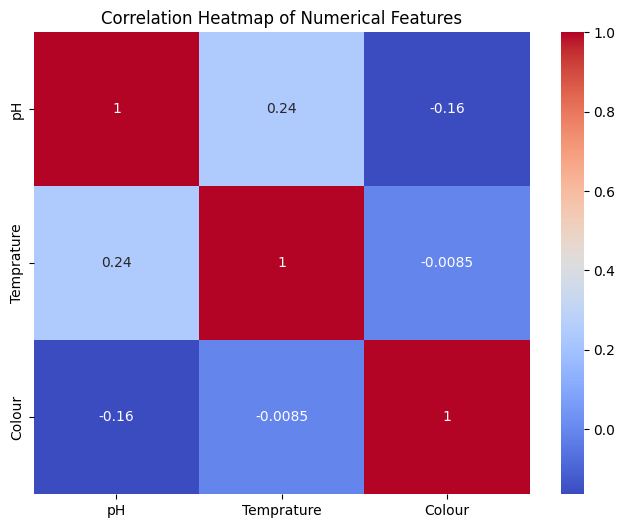

In [ ]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 2. Build a Model from Scratch (Softmax Regression)

Step 1: Prepare the Data

In [ ]:
df['Grade'] = df['Grade'].astype(str)

In [ ]:
# Encode the target column (Grade) into numerical values
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # low: 0, medium: 1, high: 2

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Grade']).values  # Features
y = df['Grade'].values  # Target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 2: Build Softmax Regression from Scratch

In [ ]:
def softmax(z):
    # Subtract the max value for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    # One-hot encode y_true
    y_true_one_hot = np.eye(np.max(y_true) + 1)[y_true]
    # Compute cross-entropy loss
    loss = -np.mean(np.sum(y_true_one_hot * np.log(y_pred + 1e-15), axis=1))
    return loss

In [ ]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Compute logits
            logits = np.dot(X, self.weights) + self.bias
            # Compute softmax probabilities
            y_pred = softmax(logits)

            # Compute gradients
            y_true_one_hot = np.eye(n_classes)[y]
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y_true_one_hot))
            db = (1 / n_samples) * np.sum(y_pred - y_true_one_hot, axis=0)

            # Update weights and bias
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_pred = softmax(logits)
        return np.argmax(y_pred, axis=1)

In [ ]:
# Initialize and train the Softmax Regression model
model = SoftmaxRegression(learning_rate=0.1, n_iterations=5000)
model.fit(X_train, y_train)

# Predictions on train set
y_train_pred = model.predict(X_train)

# Predictions on test set
y_test_pred = model.predict(X_test)

# Accuracy on train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Classification report
train_report = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)
test_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nTrain Classification Report:\n", train_report)
print("\nTest Classification Report:\n", test_report)
print("\nTrain Confusion Matrix:\n", train_conf_matrix)
print("\nTest Confusion Matrix:\n", test_conf_matrix)

Train Accuracy: 0.8485
Test Accuracy: 0.7647

Train Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.81      0.68      0.74        19
           2       0.92      0.88      0.90        26

    accuracy                           0.85        66
   macro avg       0.84      0.84      0.84        66
weighted avg       0.85      0.85      0.85        66


Test Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.71      0.83         7
           2       1.00      0.75      0.86         8

    accuracy                           0.76        17
   macro avg       0.78      0.82      0.73        17
weighted avg       0.92      0.76      0.81        17


Train Confusion Matrix:
 [[20  0  1]
 [ 5 13  1]
 [ 0  3 23]]

Test Confusion Matrix:
 [[2 0 0]
 [2 5 0]
 [2 0 6]]


# 3. BUILD A PRIMARY MODEL (Logistic Regression & Random Forest Classifier)

Step 1: Prepare the Data

In [ ]:
# Encode the target column (Grade) into numerical values
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # low: 0, medium: 1, high: 2

# Separate features (X) and target (y)
X = df.drop(columns=['Grade']).values  # Features
y = df['Grade'].values  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Step 2. Build and Train Models (Logistic Regression & Random Forest Classifier)

In [ ]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Initialize and train the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions using Logistic Regression
y_test_pred_log_reg = log_reg.predict(X_test)

# Predictions using Random Forest Classifier
y_test_pred_rf_clf = rf_clf.predict(X_test)

# Function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_test_pred_log_reg, "Logistic Regression")

# Evaluate Random Forest Classifier
evaluate_model(y_test, y_test_pred_rf_clf, "Random Forest Classifier")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.7059

Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.57      0.73         7
           2       0.86      0.75      0.80         8

    accuracy                           0.71        17
   macro avg       0.73      0.77      0.68        17
weighted avg       0.85      0.71      0.73        17

Confusion Matrix:
 [[2 0 0]
 [2 4 1]
 [2 0 6]]


Evaluation Metrics for Random Forest Classifier:
Accuracy: 0.8235

Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.86      0.92         7
           2       1.00      0.75      0.86         8

    accuracy                           0.82        17
   macro avg       0.80      0.87      0.78        17
weighted avg       0.93      0.82      0.85        17

Confusion Ma

# 4. Hyper-parameter Optimization with Cross-Validation (Using GridSearchCV)

In [ ]:
 # 1. Hyperparameter grid for Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l1', 'l2'],          # Regularization type
    'solver': ['saga']   # Solvers for small datasets
}

# 2. Hyperparameter grid for Random Forest Classifier
rf_params = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 10, 20, 30],    # Maximum depth of trees
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples at leaf nodes
    #'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at each split
}

# 3. GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params,
                            cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

# 4. GridSearchCV for Random Forest Classifier
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params,
                       cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# 5. Best hyperparameters
print("Best Hyperparameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", log_reg_grid.best_score_, "+\n")

print("Best Hyperparameters for Random Forest Classifier:", rf_grid.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_grid.best_score_, "+\n")

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7901098901098902 +

Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8802197802197803 +



# 5. Feature Selection

In [ ]:
# Encoding the target variable (Grade)
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # low: 0, medium: 1, high: 2

# Separating features and target
y = df['Grade']
X = df.drop(columns=['Grade']) # Keep X as a DataFrame

# Train Random Forest to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extracting feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns, # Now X.columns will work
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
1,Temprature,0.296024
0,pH,0.265643
4,Fat,0.122360
3,Odor,0.092144
6,Colour,0.085533
5,Turbidity,0.076255
2,Taste,0.062040


In [ ]:
# Separate features and target variable
X = df.drop('Grade', axis=1)
y = df['Grade']

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Random Forest model on scaled features for Logistic Regression
rf_model_log_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_log_reg.fit(X_scaled, y)

# Get feature importances
importances_log_reg = rf_model_log_reg.feature_importances_
feature_importance_df_log_reg = pd.DataFrame({'Feature': X.columns, 'Importance': importances_log_reg})
feature_importance_df_log_reg = feature_importance_df_log_reg.sort_values(by='Importance', ascending=False)

# Select features with importance greater than a threshold (e.g., 0.05)
threshold_log_reg = 0.07
log_reg_selected_features = feature_importance_df_log_reg[feature_importance_df_log_reg['Importance'] > threshold_log_reg]['Feature']

print("Selected Features from Random Forest for Logistic Regression:", log_reg_selected_features.values, "\n")

# Fit another Random Forest model on original features for Random Forest Classifier
rf_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_rf.fit(X, y)

# Get feature importances
importances_rf = rf_model_rf.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Select features with importance greater than a threshold (e.g., 0.05)
threshold_rf = 0.07
rf_selected_features = feature_importance_df_rf[feature_importance_df_rf['Importance'] > threshold_rf]['Feature']

print("Selected Features from Random Forest for Random Forest Classifier:", rf_selected_features.values)


Selected Features from Random Forest for Logistic Regression: ['Temprature' 'pH' 'Fat ' 'Odor' 'Colour' 'Turbidity'] 

Selected Features from Random Forest for Random Forest Classifier: ['Temprature' 'pH' 'Fat ' 'Odor' 'Colour' 'Turbidity']


# 6. Final Model

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
df['Grade'] = label_encoder.fit_transform(df['Grade'])  # low: 0, medium: 1, high: 2

# Select features based on Random Forest Importance
log_reg_selected_features = ['pH', 'Temprature', 'Turbidity', 'Fat ', 'Odor', 'Colour']            #not allowing fat to be included
rf_selected_features = ['pH', 'Temprature', 'Turbidity', 'Fat ','Odor', 'Colour']

# Separate Features and Target
X_log_reg = df[log_reg_selected_features]
X_rf = df[rf_selected_features]
y = df['Grade']

# Train-Test Split
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log_reg, y, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, _, _ = train_test_split(X_rf, y, test_size=0.2, random_state=42)  # Same target

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

# Best Hyperparameters from GridSearchCV (Replace with actual values)
best_params_log_reg = {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
best_params_rf = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

# Train Final Logistic Regression Model
log_reg = LogisticRegression(**best_params_log_reg)
log_reg.fit(X_train_log, y_train)

# Train Final Random Forest Classifier
rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
rf_clf.fit(X_train_rf, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_log)
y_pred_rf_clf = rf_clf.predict(X_test_rf)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n" + "="*50 + "\n")

# Evaluate Final Models
evaluate_model(y_test, y_pred_log_reg, "Final Logistic Regression")
evaluate_model(y_test, y_pred_rf_clf, "Final Random Forest Classifier")


Evaluation Metrics for Final Logistic Regression:
Accuracy: 0.7647

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       1.00      0.71      0.83         7
           2       0.88      0.88      0.88         8

    accuracy                           0.76        17
   macro avg       0.71      0.70      0.68        17
weighted avg       0.85      0.76      0.79        17

Confusion Matrix:
 [[1 0 1]
 [2 5 0]
 [1 0 7]]


Evaluation Metrics for Final Random Forest Classifier:
Accuracy: 0.8824

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.86      0.92         7
           2       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.85      0.91      0.87        17
weighted avg       0.90      0.88      0.89        17



# Conclusion

1. Model Performance

The initial Logistic Regression model achieved an accuracy of 70.59%, with moderate performance in classifying different grades.
The initial Random Forest model outperformed Logistic Regression with an accuracy of 82.35%, showing stronger classification capability.
After hyperparameter tuning, the final Logistic Regression model improved to 76.47% accuracy, while the final Random Forest model further improved to 88.24% accuracy.
Random Forest consistently outperformed Logistic Regression, likely due to its ability to capture complex relationships in the data.

2. Impact of Methods Hyperparameter Tuning (GridSearchCV):

Improved Logistic Regression's accuracy by ~6% and Random Forest's accuracy by ~6%, showing that selecting optimal parameters significantly enhanced model performance.
The best parameters for Logistic Regression were C = 1, L1 penalty, and SAGA solver, and for Random Forest, 200 trees, min_samples_split=5.
Feature Selection (Random Forest Importance):

The most important features selected were pH, Temperature, Turbidity, Fat, Odor, and Colour.
Removing less important features likely reduced noise and led to better performance.
Cross-Validation:

The cross-validation accuracy for Logistic Regression (79.01%) and Random Forest (88.02%) indicated that these models generalize well to unseen data.

3. Insights and Future Directions

Insights:

Random Forest is a better choice for this classification task due to its robustness and ability to handle non-linearity in data.
Feature selection improved model efficiency without losing predictive power.
Hyperparameter tuning significantly improved model accuracy, emphasizing the need for model optimization.

Future Improvements:

Experiment with ensemble learning, such as combining Logistic Regression and Random Forest predictions.
Try alternative models like Gradient Boosting or XGBoost to compare performance.
Increase dataset size to improve generalization and reduce overfitting risks.
Perform further feature engineering, such as polynomial features or interaction terms, to enhance model performance.
Overall, the final Random Forest model achieved the best performance (88.24% accuracy), making it the most suitable choice for classification.